In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import norm, invgamma, beta, bernoulli
%matplotlib notebook

In [2]:
import sys
sys.path.append("C:/Users/clementine.rosier/OneDrive - Ekimetrics/Documents/GitHub/dynamic_pricing")

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("C:/Users/clementine.rosier/OneDrive - Ekimetrics/Documents/GitHub/dynamic_pricing")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from src.binomial_bandit import BinomialBandit
from src.context_generator import ContextGenerator
from src.simulation_with_context import ContextualDemandSimulation
from src.evaluate_model import EvaluateBandit
from src.evaluate_with_context import EvaluateBanditContext


In [38]:
beta_c=np.array([5,2,3])
mu_c=np.array([3,50,87])
sigma_c=np.array([1,9,10])
beta_d=np.array([[1,-1],[2,100,-1]])
n=np.array([2,3])
mu_e=-300
sigma_e=15
#instantiate context simulation
context_generator = ContextGenerator(mu_c,sigma_c,n)

#instantiate demand simulation
demand_simulation = ContextualDemandSimulation(beta_c, beta_d, mu_e, sigma_e)

# Instanciate bandit
size_context= len(mu_c) + sum(n) + 1

In [39]:
size = 30
k_p = np.linspace(20,80,size)
alpha_0 = np.repeat(6,size)
beta_0 = np.repeat(6,size)

In [40]:
hist = []
regret = []
reward_T = []
parameters=np.array([np.array([alpha_0]),np.array([beta_0])])
bandit = BinomialBandit(k_p, alpha_0, beta_0)
evaluation=EvaluateBanditContext(bandit,demand_simulation)

BinomialBandit model instanciated with 30 arms.


In [41]:
j=1
context_c, context_d = context_generator.simulate()
bandit.chose_action(force_action=j)
price = k_p[bandit.action]
reward = int(demand_simulation.evaluate(price,context_c, context_d)) * price
regret.append(evaluation.get_regret(bandit.n_obs,bandit.action,context_c, context_d))
bandit.update(bandit.action, reward)
parameters = np.append(parameters,np.array([np.array([bandit.alpha_n]),np.array([bandit.beta_n])]),axis=1)

In [52]:
def test_simplebandit_context(simulation):
    hist = []
    regret = []
    reward_T = []
    parameters=np.array([np.array([alpha_0]),np.array([beta_0])])
    bandit = BinomialBandit(k_p, alpha_0, beta_0)
    evaluation=EvaluateBanditContext(bandit,simulation)
    # Exploration round
    for i in range(30):
        for j in range(bandit.k):
            context_c, context_d = context_generator.simulate()
            bandit.chose_action(force_action=j)
            price = k_p[bandit.action]
            reward = int(simulation.evaluate(price,context_c, context_d)) * price
            regret.append(evaluation.get_regret(bandit.n_obs,bandit.action,context_c, context_d))
            bandit.update(bandit.action, reward)
            parameters = np.append(parameters,np.array([np.array([bandit.alpha_n]),np.array([bandit.beta_n])]),axis=1)

    for i in range(3000):
        context_c, context_d = context_generator.simulate()
        bandit.chose_action(method="thompson")
        price = k_p[bandit.action]
        reward = int(simulation.evaluate(price,context_c, context_d)) * price
        regret.append(evaluation.get_regret(bandit.n_obs,bandit.action,context_c, context_d))
        bandit.update(bandit.action, reward)
        hist.append(bandit.action)
        parameters = np.append(parameters,np.array([np.array([bandit.alpha_n]),np.array([bandit.beta_n])]),axis=1)
    return hist,regret,parameters

In [53]:
bandit_context_simple=test_simplebandit_context(demand_simulation)

BinomialBandit model instanciated with 30 arms.


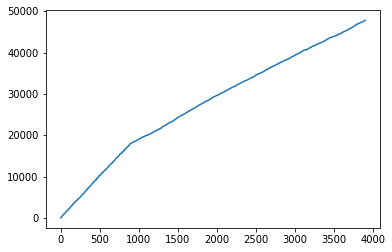

In [54]:
plt.plot(bandit_context_simple[1])

In [56]:
#instantiate for contextual bandit
norm_mean = 0
norm_std = 1
m_0 = np.zeros(shape=(len(k_p),size_context)) + norm_mean
q_0 = np.zeros(shape=(len(k_p),size_context)) + norm_std

In [57]:
def test_contextualbandit_context(simulation):
    hist = []
    regret = []
    reward_T = []
    parameters=np.array([np.array([m_0]),np.array([q_0])])
    bandit = ContextBandit(k_p,size_context,m_0,q_0)
    evaluation=EvaluateBanditContext(bandit,simulation)
    # Exploration round
    for i in range(30):
        for j in range(bandit.k):
            context_c, context_d = context_generator.simulate()
            bandit.chose_action(force_action=j)
            price = k_p[bandit.action]
            reward = int(simulation.evaluate(price,context_c, context_d)) * price
            regret.append(evaluation.get_regret(bandit.n_obs,bandit.action,context_c, context_d))
            bandit.update(bandit.action, reward)
            parameters = np.append(parameters,np.array([np.array([bandit.m_n]),np.array([bandit.q_n])]),axis=1)

    for i in range(3000):
        context_c, context_d = context_generator.simulate()
        bandit.chose_action(method="thompson")
        price = k_p[bandit.action]
        reward = int(simulation.evaluate(price,context_c, context_d)) * price
        regret.append(evaluation.get_regret(bandit.n_obs,bandit.action,context_c, context_d))
        bandit.update(bandit.action, reward)
        hist.append(bandit.action)
        parameters = np.append(parameters,np.array([np.array([bandit.m_n]),np.array([bandit.q_n])]),axis=1)
    return hist,regret,parameters

In [58]:
bandit_context_simple=test_simplebandit_context(demand_simulation)

BinomialBandit model instanciated with 30 arms.


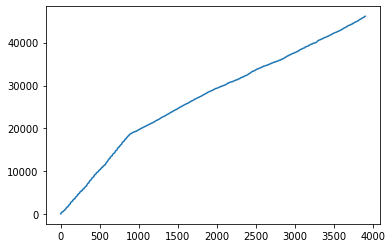

In [59]:
plt.plot(bandit_context_simple[1])